# Метод Пиявского

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import time
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
# read function from file
# with open('function.txt') as f:
#     lines = f.readlines()
    
# f = lambda x: eval(lines[0])

In [5]:
f = lambda x: (x**2 - 4)**2 +(x**3+3) + (x - 4)**2
# f = lambda x: 0.5 * x + 0.2 * np.cos(3.14 * x) + 0.2 * np.sin(2 * 3.14 * x)
interval = [-2.9, 2.4]
# interval = [-2, 1]

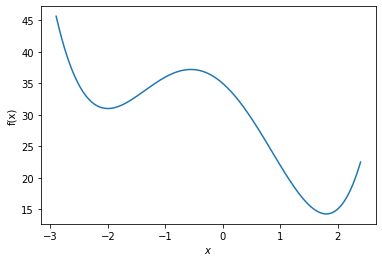

In [6]:
partition = np.linspace(interval[0], interval[1], 1000)

plt.plot(partition, f(partition))
plt.xlabel('$x$')
plt.ylabel('f(x)')

plt.show()

In [7]:
from random import random
from random import sample
from random import uniform

In [11]:

def ensure_bounds(vec, bounds):

    vec_new = []
    # cycle through each variable in vector 
    for i in range(len(vec)):

        # variable exceedes the minimum boundary
        if vec[i] < bounds[i][0]:
            vec_new.append(bounds[i][0])

        # variable exceedes the maximum boundary
        if vec[i] > bounds[i][1]:
            vec_new.append(bounds[i][1])

        # the variable is fine
        if bounds[i][0] <= vec[i] <= bounds[i][1]:
            vec_new.append(vec[i])
        
    return vec_new



## Функция оптимизации дифференциальной эволюцией

In [112]:

def minimize(cost_func, bounds, popsize, mutate, recombination, maxiter):
    path=[]
    population = []
    for i in range(0,popsize):
        indv = []
        for j in range(len(bounds)):
            indv.append(uniform(bounds[j][0],bounds[j][1]))
        population.append(indv)
    last_gen_avg=-100000
    for i in range(1,maxiter+1):
        print ("Поколение:",i)
        #print(population)
        gen_scores = [] 
        for j in range(0, popsize):
            
            candidates = list(range(0,popsize))
            candidates.remove(j)
            random_index = sample(candidates, 3)

            x_1 = population[random_index[0]]
            x_2 = population[random_index[1]]
            x_3 = population[random_index[2]]
            x_t = population[j] 

            x_diff = [x_2_i - x_3_i for x_2_i, x_3_i in zip(x_2, x_3)]

            v_donor = [x_1_i + mutate * x_diff_i for x_1_i, x_diff_i in zip(x_1, x_diff)]
            v_donor = ensure_bounds(v_donor, bounds)

            v_trial = []
            for k in range(len(x_t)):
                crossover = random()
                if crossover <= recombination:
                    v_trial.append(v_donor[k])

                else:
                    v_trial.append(x_t[k])

            score_trial  = cost_func(v_trial)
            score_target = cost_func(x_t)

            if score_trial < score_target:
                population[j] = v_trial
                gen_scores.append(score_trial)
                print( 'f(x), [x] = ',score_trial, v_trial)

            else:
                print( 'f(x), [x] = ',score_target, x_t)
                gen_scores.append(score_target)
        

        gen_avg = sum(gen_scores) / popsize                        
        gen_best = min(gen_scores)                                 
        gen_sol = population[gen_scores.index(min(gen_scores))] 
        path.append([gen_best,gen_sol])

        print ('> Среднее:',gen_avg)
        print ('> Лучшее:',gen_best)
        print ('   > Лучшее решение:',gen_sol,'\n')
        
        
        
        
        if abs(gen_avg-last_gen_avg)<0.000001:
            return path
        last_gen_avg=gen_avg
    return path
        
    

# Запускаем

In [113]:
bounds = [interval]            # bounds [(x1_min, x1_max), (x2_min, x2_max),...]
popsize = 30                        # population size, must be >= 4
mutate = 0.2                      # mutation factor [0,2]
recombination = 0.73                # recombination rate [0,1]
maxiter = 20    
cost_func=lambda x: sum(f(el) for el in x)

In [114]:
# %%time
t=time.time()
results=minimize(cost_func , bounds, popsize, mutate, recombination, maxiter)
gen_time=time.time()-t
f"exec time: {gen_time}"

Поколение: 1
f(x), [x] =  31.465815445858933 [-1.7785528563801456]
f(x), [x] =  15.36303254848037 [1.539046568945896]
f(x), [x] =  34.02707833598991 [-1.3310729408713362]
f(x), [x] =  42.653978021913105 [-2.8184228560587186]
f(x), [x] =  35.59781365130286 [-0.08044968906116257]
f(x), [x] =  23.62688067853748 [0.8926738935246954]
f(x), [x] =  31.246209257932584 [-2.143106627628735]
f(x), [x] =  15.050161707196443 [1.5816631472744098]
f(x), [x] =  17.39312138632077 [2.1888586642107524]
f(x), [x] =  15.613613219253788 [1.5085363079243024]
f(x), [x] =  14.339909431448085 [1.731984496148932]
f(x), [x] =  28.41841093528157 [0.5726652411408968]
f(x), [x] =  31.02251564121198 [-1.9540863255630425]
f(x), [x] =  35.74952372384625 [-1.0482977994725975]
f(x), [x] =  33.75463037500741 [-2.43937905536555]
f(x), [x] =  31.65211652791504 [-1.7338780338373765]
f(x), [x] =  19.155265094484 [2.276008456739652]
f(x), [x] =  32.419652594570984 [-1.5857194049341437]
f(x), [x] =  31.31137074488507 [0.3571792

'exec time: 0.14365720748901367'

## Изобразим процесс

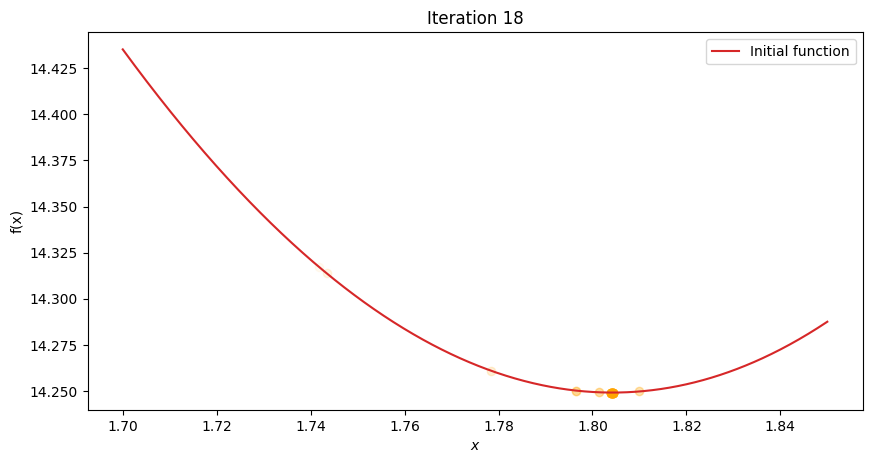

In [116]:
# partition = np.linspace(interval[0], interval[1], 1000)
partition = np.linspace(1.7, 1.85, 1000)
plt.subplots(figsize=(10, 5), dpi=100)
plt.plot(partition, f(partition), color='tab:red', label='Initial function')
for i in range(len(results)): 
    el=results[i]
    plt.scatter(el[1][0], el[0], color='orange', zorder=2,alpha=(i/len(results)))
#     plt.scatter(u, f(u), zorder=3, color='black', s=40, label=f'x={round(u, 4)}')

    plt.title(f'Iteration {i}')
    plt.xlabel('$x$')
    plt.ylabel('f(x)')
    plt.legend()
plt.show()

### Сравнение с готовым решением оптимизации - моедулем scipy.minimize

In [117]:
from scipy.optimize import minimize

st = time.time()
res=minimize(f, x0=interval[0], bounds=[(interval[0], interval[1])])

scipy_res = res.x[0]
niter_scipy = res.nit
et = time.time()

In [118]:
# 1.805806	96	0.003985

pd.DataFrame([['1.805806', results[-1][1][0]], 
              ['96', len(results)], 
              ['0.003985', gen_time]], 
             columns=['Метод Пиявского', 'Дифференциальная эволюция'], 
             index=['Результат', 'num_iterations', 'Exec. time']).T




,Результат,num_iterations,Exec. time
Метод Пиявского,1.805806,96,0.003985
Дифференциальная эволюция,1.804245,19.0,0.143657
